In [729]:
import os
from dotenv import load_dotenv
import time 
import ast
import sqlite3
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV

In [730]:
load_dotenv()

rent_cast_api_key = os.getenv('API_KEY')

if rent_cast_api_key:
    print("API Key loaded successfully!")
else:
    print("API Key not found. Please check your .env file.")


API Key loaded successfully!


In [731]:
 # Property Records
 # Query Params
 #state = 'FL'
 #saleDateRange = '365'
 #limit = 500  # Max limit per request
 #offset = 0    # Starting offset
 #total_properties = 145000  # Total number of properties you want
 #properties = []  # List to store properties
 #url = 'https://api.rentcast.io/v1/properties'

In [732]:
# # Function to get properties
#def get_properties(offset):
#     queryparams = {
#         'state': state,
#         'saleDateRange': saleDateRange,
#         'limit': limit,
#         'offset': offset
#     }
#     headers = {
#         "accept": "application/json",
#         "X-Api-Key": rent_cast_api_key
#     }
    
#     response = requests.get(url, headers=headers, params=queryparams)
    
#     # Check if response is successful
#     if response.status_code == 200:
#         data = response.json()
#         return data  # The response is already a list, so return it directly
#     else:
#         print(f"Error {response.status_code}: {response.text}")
#         return []

In [733]:
# # Loop through requests and get the properties
#while len(properties) < total_properties:
     #print(f"Getting properties: {len(properties)} / {total_properties}")
     #current_properties = get_properties(offset)
    
     #if not current_properties:
     #    print("No more properties found.")
    #     break
    
     #properties.extend(current_properties) 
     #offset += limit  
    
     #time.sleep(1)

In [734]:
property_record_one = pd.read_csv('/workspaces/mds8-final-project-bmh/src/property_record_one.csv')
property_record_two = pd.read_csv('/workspaces/mds8-final-project-bmh/src/property_record_two.csv')

In [735]:
# Read in the .csv file
#property_record_one = pd.read_csv('./src/property_record_one.csv')
#property_record_two = pd.read_csv('./src/property_record_two.csv')

In [736]:
combined_df = pd.concat([property_record_one, property_record_two], ignore_index=True)

In [737]:
print(property_record_one.shape)
print(property_record_two.shape)

(72500, 29)
(72500, 29)


In [738]:
rent_cast_data = combined_df

In [739]:
# Drop duplicate rows for the entire DataFrame
rent_cast_data = rent_cast_data.drop_duplicates()


In [740]:
rent_cast_data.duplicated().sum()

np.int64(0)

In [741]:
rent_cast_data.dtypes

id                   object
formattedAddress     object
addressLine1         object
addressLine2         object
city                 object
state                object
zipCode               int64
county               object
latitude            float64
longitude           float64
propertyType         object
bedrooms            float64
bathrooms           float64
squareFootage       float64
lotSize             float64
yearBuilt           float64
assessorID           object
legalDescription     object
subdivision          object
zoning               object
lastSaleDate         object
lastSalePrice       float64
features             object
taxAssessments       object
propertyTaxes        object
history              object
owner                object
ownerOccupied        object
hoa                  object
dtype: object

In [742]:
pd.set_option('display.max_columns', None)

In [743]:
rent_cast_data.lastSaleDate = pd.to_datetime(rent_cast_data.lastSaleDate)

rent_cast_data['year_month'] = rent_cast_data['lastSaleDate'].dt.to_period('M')

m_rate = {
'2024-03':0.0682,
'2024-04':0.0699,
'2024-05':0.076,
'2024-06':0.0692,
'2024-07':0.0685,
'2024-08':0.065,
'2024-09':0.0618,
'2024-10':0.0643,
'2024-11':0.0681,
'2024-12':0.0672,
'2025-01':0.0668
}

rent_cast_data['year_month'] = rent_cast_data['year_month'].dt.strftime('%Y-%m')

rent_cast_data['m_rate'] = rent_cast_data['year_month'].map(m_rate)

/tmp/ipykernel_31221/2807021962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_cast_data.lastSaleDate = pd.to_datetime(rent_cast_data.lastSaleDate)
/tmp/ipykernel_31221/2807021962.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rent_cast_data['year_month'] = rent_cast_data['lastSaleDate'].dt.to_period('M')
/tmp/ipykernel_31221/2807021962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_cast_data['year_month'] = rent_cast_data['lastSaleDat

In [744]:
print(rent_cast_data['propertyType'].unique())
print(rent_cast_data['propertyType'].value_counts())

['Condo' 'Single Family' 'Townhouse' 'Land' 'Multi-Family' 'Manufactured'
 nan 'Apartment']
propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2397
Townhouse         1732
Apartment          551
Name: count, dtype: int64


In [745]:
apartment_data = rent_cast_data[rent_cast_data['propertyType'] == 'Apartment']

min_price = apartment_data['lastSalePrice'].min()
median_price = apartment_data['lastSalePrice'].median()
max_price = apartment_data['lastSalePrice'].max()
mean_price = apartment_data['lastSalePrice'].mean()
mode_price = apartment_data['lastSalePrice'].mode()[0]  
# Print the results
print("Min Price:", min_price)
print("Median Price:", median_price)
print("Max Price:", max_price)
print("Mean Price:", mean_price)
print("Mode Price:", mode_price)

Min Price: 5000.0
Median Price: 495000.0
Max Price: 139250000.0
Mean Price: 4215296.533575318
Mode Price: 3700000.0


/tmp/ipykernel_31221/3264417908.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_data['Price Category'] = pd.cut(apartment_data['lastSalePrice'], bins=bins, labels=labels, right=False)


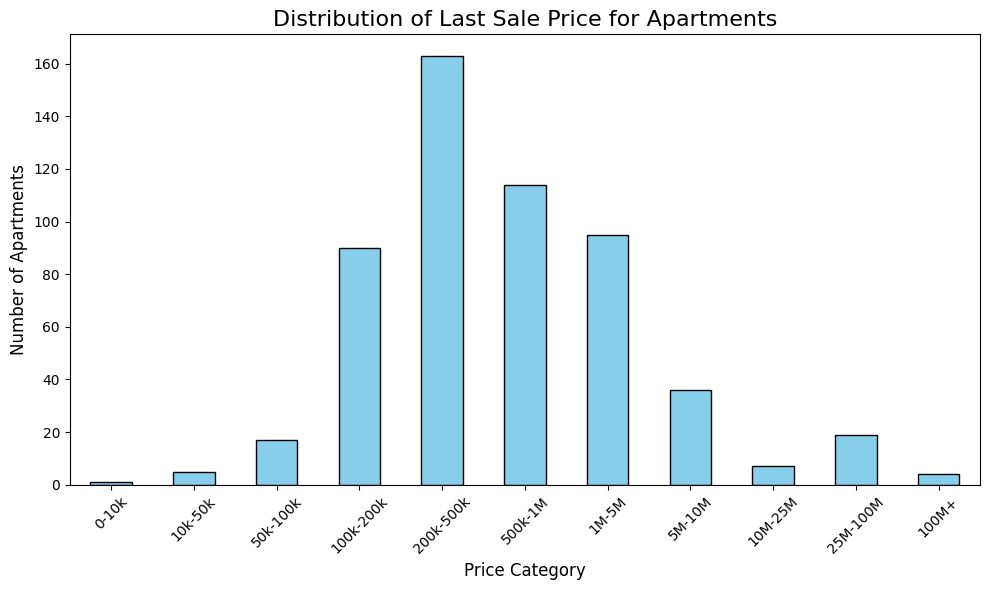

In [746]:
bins = [0, 10000, 50000, 100000, 200000, 500000, 1000000, 5000000, 10000000, 25000000, 100000000, 150000000]
labels = ['0-10k', '10k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-25M', '25M-100M', '100M+']

apartment_data = rent_cast_data[rent_cast_data['propertyType'] == 'Apartment']

apartment_data['Price Category'] = pd.cut(apartment_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = apartment_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Apartments', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Apartments', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [747]:
# Filtering for 'Apartment' homes with lastSalePrice between 100k and 825k
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Apartment') & 
                                  ((rent_cast_data['lastSalePrice'] > 825000) | 
                                   (rent_cast_data['lastSalePrice'] < 100000)))]

rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2397
Townhouse         1732
Apartment          335
Name: count, dtype: int64

In [748]:
townhouse_data = rent_cast_data[rent_cast_data['propertyType'] == 'Townhouse']

min_price = townhouse_data['lastSalePrice'].min()
median_price = townhouse_data['lastSalePrice'].median()
max_price = townhouse_data['lastSalePrice'].max()
mean_price = townhouse_data['lastSalePrice'].mean()
mode_price = townhouse_data['lastSalePrice'].mode()[0]  

print(f"Min Price: {min_price}")
print(f"Median Price: {median_price}")
print(f"Max Price: {max_price}")
print(f"Mean Price: {mean_price}")
print(f"Mode Price: {mode_price}")

Min Price: 410.0
Median Price: 345800.0
Max Price: 35714286.0
Mean Price: 1014355.2232504338
Mode Price: 300000.0


/tmp/ipykernel_31221/420867537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  townhouse_data['Price Category'] = pd.cut(townhouse_data['lastSalePrice'], bins=bins, labels=labels, right=False)


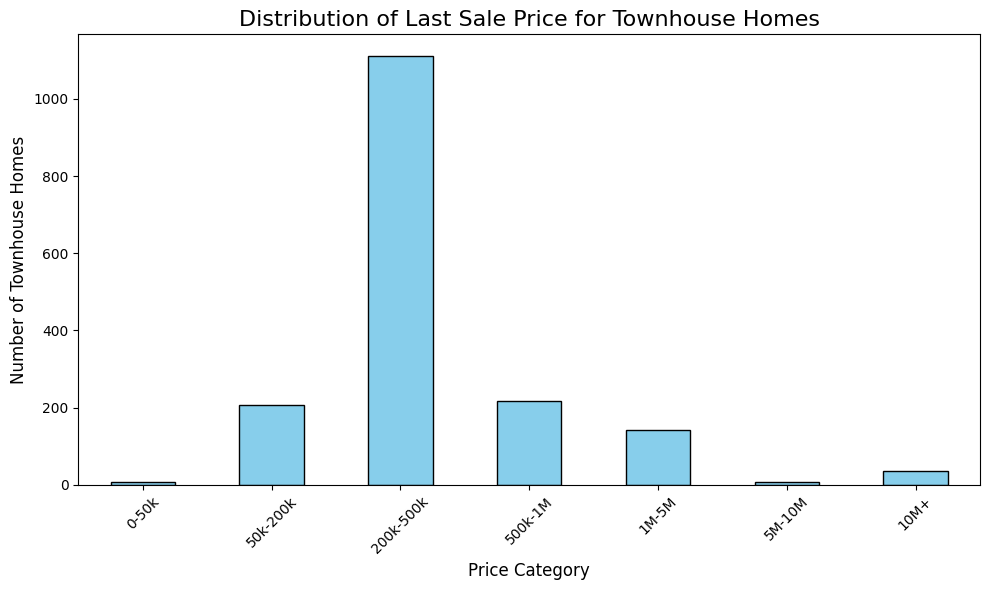

In [749]:
townhouse_data = rent_cast_data[rent_cast_data['propertyType'] == 'Townhouse']

bins = [0, 50000, 200000, 500000, 1000000, 5000000, 10000000, 35714286]
labels = ['0-50k', '50k-200k', '200k-500k', '500k-1M', '1M-5M', '5M-10M', '10M+']

townhouse_data['Price Category'] = pd.cut(townhouse_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = townhouse_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Townhouse Homes', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Townhouse Homes', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [750]:
# Removed 'Townhouse' homes with a 'lastSalePrice' over 800k
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Townhouse') & (rent_cast_data['lastSalePrice'] > 800000))]
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2397
Townhouse         1511
Apartment          335
Name: count, dtype: int64

In [751]:
multi_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Multi-Family']

min_saleprice = multi_family_data['lastSalePrice'].min()
median_saleprice = multi_family_data['lastSalePrice'].median()
max_saleprice = multi_family_data['lastSalePrice'].max()
mean_saleprice = multi_family_data['lastSalePrice'].mean()
mode_saleprice = multi_family_data['lastSalePrice'].mode()[0] 

print(f"Min Sale Price: {min_saleprice}")
print(f"Median Sale Price: {median_saleprice}")
print(f"Max Sale Price: {max_saleprice}")
print(f"Mean Sale Price: {mean_saleprice}")
print(f"Mode Sale Price: {mode_saleprice}")

Min Sale Price: 6000.0
Median Sale Price: 475000.0
Max Sale Price: 111640000.0
Mean Sale Price: 799123.7430120985
Mode Sale Price: 500000.0


/tmp/ipykernel_31221/3715092442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_family_data['Price Category'] = pd.cut(multi_family_data['lastSalePrice'], bins=bins, labels=labels, right=False)


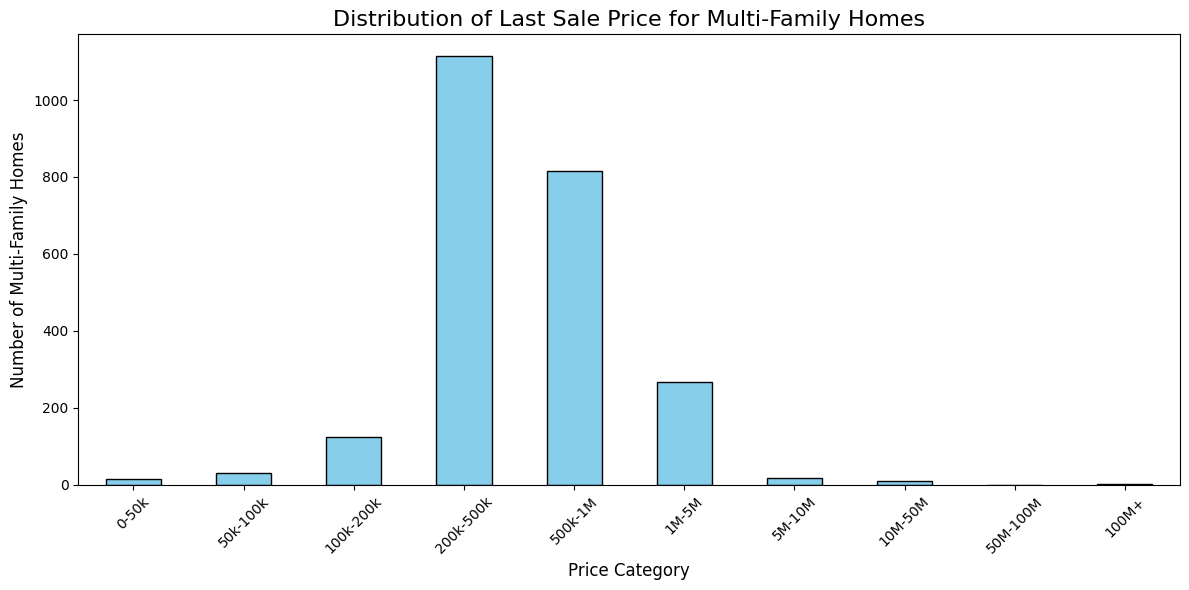

In [752]:
bins = [0, 50000, 100000, 200000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 250000000]
labels = ['0-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '100M+']

multi_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Multi-Family']

multi_family_data['Price Category'] = pd.cut(multi_family_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = multi_family_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Multi-Family Homes', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Multi-Family Homes', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [753]:
# Filtering the DataFrame to exclude 'Multi-Family' homes with 'lastSalePrice' > 1M
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Multi-Family') & (rent_cast_data['lastSalePrice'] > 1000000))]
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2106
Townhouse         1511
Apartment          335
Name: count, dtype: int64

In [754]:
manufactured_data = rent_cast_data[rent_cast_data['propertyType'] == 'Manufactured']

min_sale_price = manufactured_data['lastSalePrice'].min()
median_sale_price = manufactured_data['lastSalePrice'].median()
max_sale_price = manufactured_data['lastSalePrice'].max()
mean_sale_price = manufactured_data['lastSalePrice'].mean()
mode_sale_price = manufactured_data['lastSalePrice'].mode()[0]

print(f"Min Sale Price: {min_sale_price}")
print(f"Median Sale Price: {median_sale_price}")
print(f"Max Sale Price: {max_sale_price}")
print(f"Mean Sale Price: {mean_sale_price}")
print(f"Mode Sale Price: {mode_sale_price}")

Min Sale Price: 600.0
Median Sale Price: 150000.0
Max Sale Price: 22500000.0
Mean Sale Price: 182260.8321845175
Mode Sale Price: 150000.0


/tmp/ipykernel_31221/3815775756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufactured_data['Price Category'] = pd.cut(manufactured_data['lastSalePrice'], bins=bins, labels=labels, right=False)


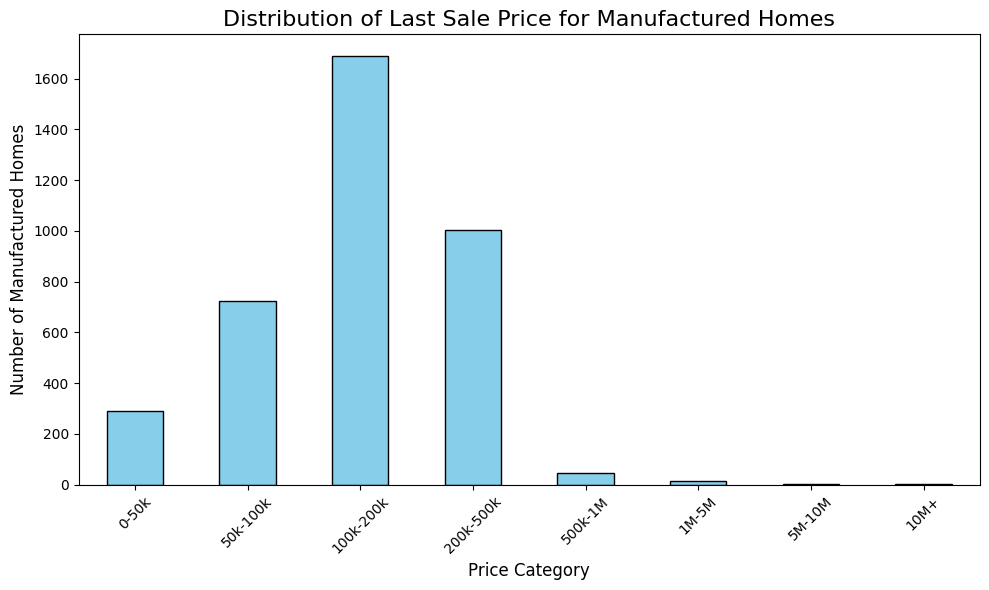

In [755]:
bins = [0, 50000, 100000, 200000, 500000, 1000000, 5000000, 10000000, 25000000]
labels = ['0-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-5M', '5M-10M', '10M+']

manufactured_data['Price Category'] = pd.cut(manufactured_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = manufactured_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Manufactured Homes', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Manufactured Homes', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [756]:
# Drop rows where 'Single Family' homes have a 'lastSalePrice' greater than 900K
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Manufactured') & (rent_cast_data['lastSalePrice'] > 900000))]

print(rent_cast_data['propertyType'].value_counts())

propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3752
Multi-Family      2106
Townhouse         1511
Apartment          335
Name: count, dtype: int64


In [757]:
condo_data = rent_cast_data[rent_cast_data['propertyType'] == 'Condo']

min_sale_price = condo_data['lastSalePrice'].min()
median_sale_price = condo_data['lastSalePrice'].median()
max_sale_price = condo_data['lastSalePrice'].max()
mean_sale_price = condo_data['lastSalePrice'].mean()
mode_sale_price = condo_data['lastSalePrice'].mode()[0]

print(f"Min Sale Price: {min_sale_price}")
print(f"Median Sale Price: {median_sale_price}")
print(f"Max Sale Price: {max_sale_price}")
print(f"Mean Sale Price: {mean_sale_price}")
print(f"Mode Sale Price: {mode_sale_price}")

Min Sale Price: 310.0
Median Sale Price: 280000.0
Max Sale Price: 345000000.0
Mean Sale Price: 486238.05507246376
Mode Sale Price: 200000.0


/tmp/ipykernel_31221/695457332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo_data['Price Category'] = pd.cut(condo_data['lastSalePrice'], bins=bins, labels=labels, right=False)


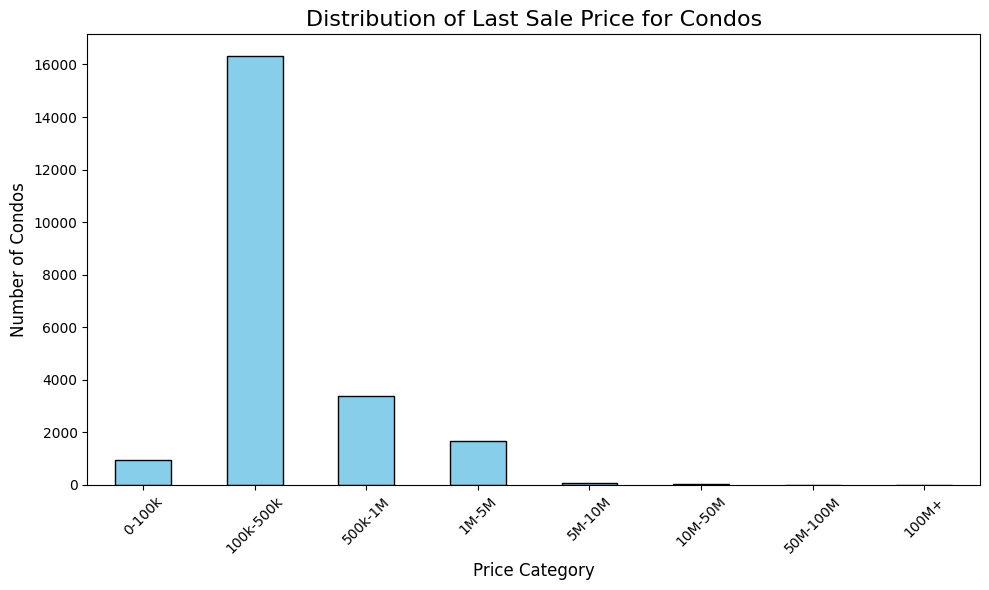

In [758]:
bins = [0, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, condo_data['lastSalePrice'].max()]

labels = ['0-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '100M+']

condo_data['Price Category'] = pd.cut(condo_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = condo_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Condos', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Condos', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [759]:
# Dropping rows out condos with 'lastSalePrice' > 900k
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Condo') & (rent_cast_data['lastSalePrice'] >= 900000))]

print(rent_cast_data['propertyType'].value_counts())

propertyType
Single Family    99979
Condo            20358
Land             11797
Manufactured      3752
Multi-Family      2106
Townhouse         1511
Apartment          335
Name: count, dtype: int64


In [760]:
single_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Single Family']

min_sale_price = single_family_data['lastSalePrice'].min()
median_sale_price = single_family_data['lastSalePrice'].median()
max_sale_price = single_family_data['lastSalePrice'].max()
mean_sale_price = single_family_data['lastSalePrice'].mean()
mode_sale_price = single_family_data['lastSalePrice'].mode()[0]

print(f"Min Sale Price: {min_sale_price}")
print(f"Median Sale Price: {median_sale_price}")
print(f"Max Sale Price: {max_sale_price}")
print(f"Mean Sale Price: {mean_sale_price}")
print(f"Mode Sale Price: {mode_sale_price}")

Min Sale Price: 300.0
Median Sale Price: 397000.0
Max Sale Price: 288000000.0
Mean Sale Price: 592821.5929315968
Mode Sale Price: 350000.0


/tmp/ipykernel_31221/4282403955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_family_data['SalePriceCategory'] = pd.cut(single_family_data['lastSalePrice'], bins=bins, labels=labels, right=False)


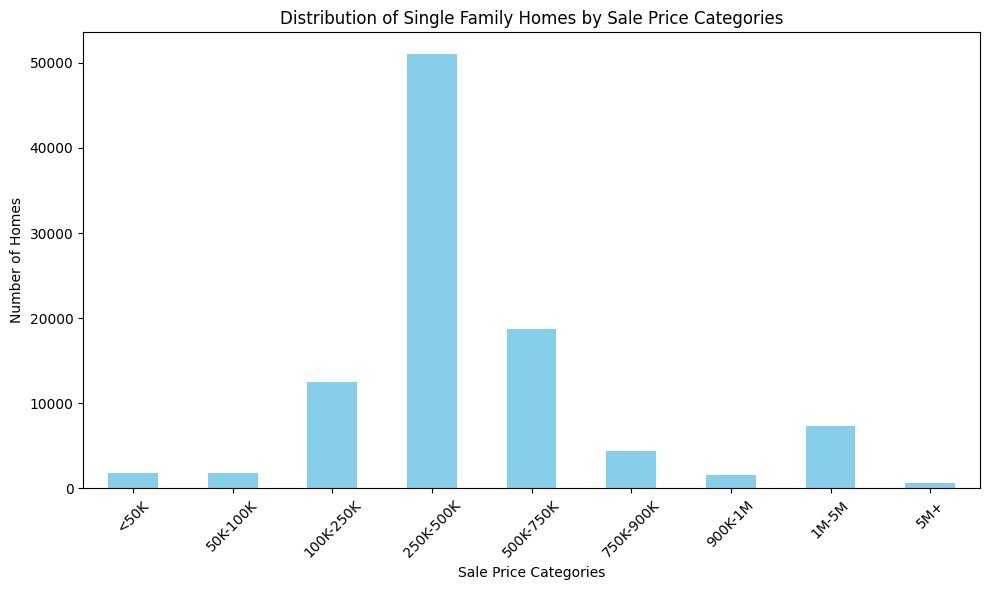

In [761]:
single_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Single Family']

bins = [0, 50000, 100000, 250000, 500000, 750000, 900000, 1000000, 5000000, float('inf')]
labels = ['<50K', '50K-100K', '100K-250K', '250K-500K', '500K-750K', '750K-900K', '900K-1M', '1M-5M', '5M+']

single_family_data['SalePriceCategory'] = pd.cut(single_family_data['lastSalePrice'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
single_family_data['SalePriceCategory'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Single Family Homes by Sale Price Categories')
plt.xlabel('Sale Price Categories')
plt.ylabel('Number of Homes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [762]:
# Drop rows where 'Single Family' homes have a 'lastSalePrice' greater than 900
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Single Family') & (rent_cast_data['lastSalePrice'] > 900000))]
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    90543
Condo            20358
Land             11797
Manufactured      3752
Multi-Family      2106
Townhouse         1511
Apartment          335
Name: count, dtype: int64

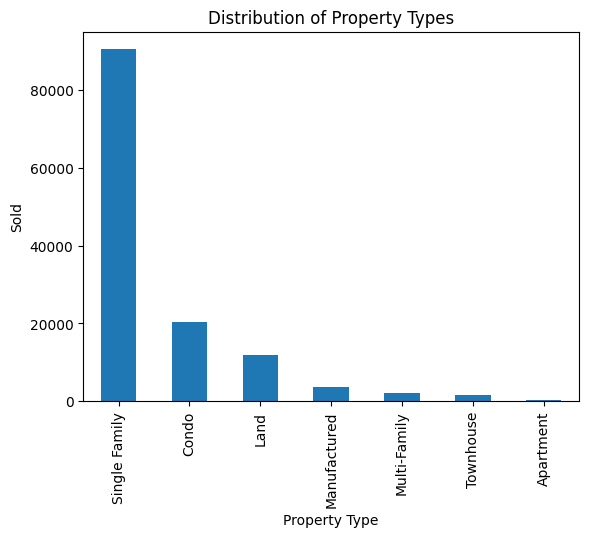

In [763]:
rent_cast_data['propertyType'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Sold')
plt.show()

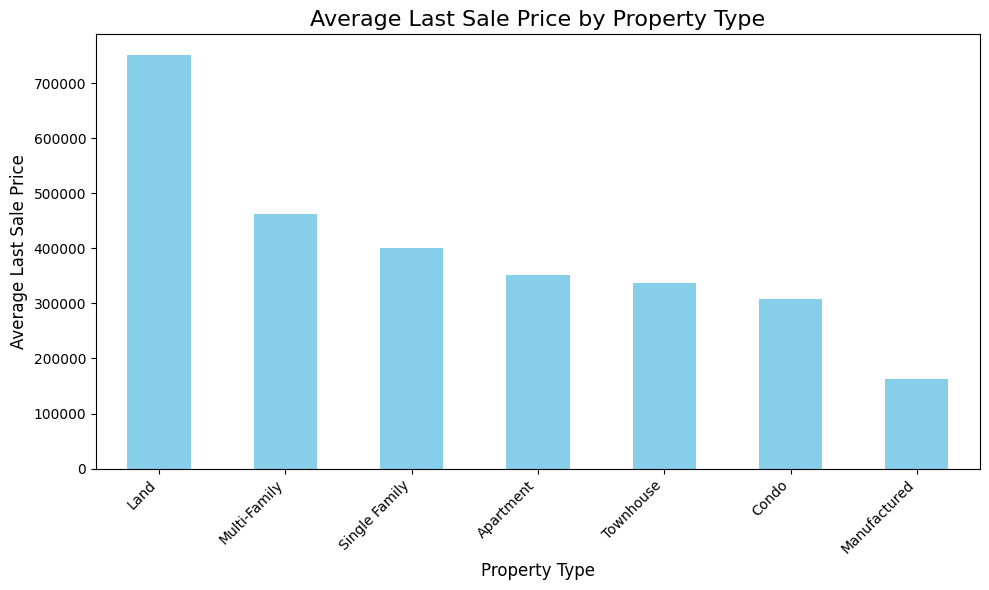

In [764]:
# Group by 'propertyType' and calculate the mean sale price for each property type
avg_price_by_property_type = rent_cast_data.groupby('propertyType')['lastSalePrice'].mean()

avg_price_by_property_type = avg_price_by_property_type.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_price_by_property_type.plot(kind='bar', color='skyblue')

plt.title('Average Last Sale Price by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Average Last Sale Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [765]:
rent_cast_data['features'].isnull().sum()

np.int64(31393)

In [766]:
rent_cast_data.dropna(subset=['features'], inplace=True)
rent_cast_data['features'].isnull().sum()

np.int64(0)

In [767]:
print(rent_cast_data.shape)
print(rent_cast_data['features'].nunique())

(101351, 31)
18548


In [768]:
rent_cast_data.shape

(101351, 31)

In [769]:
feature_list = ['cooling', 'fireplace', 'garage', 'heating', 'pool']

# Looping through each feature and creating a new column
for feature in feature_list:
    rent_cast_data[feature + '_present'] = rent_cast_data['features'].apply(
        lambda x: 1 if feature in str(x).lower() else 0
    )

In [770]:
rent_cast_data.shape

(101351, 36)

In [771]:
# List of features I want to create columns for
numeric_features = ['floorCount', 'roomCount', 'unitCount', 'garageSpaces']

# Loop through each feature and create a new column for it
for feature in numeric_features:
    rent_cast_data[feature] = rent_cast_data['features'].apply(
        lambda x: ast.literal_eval(str(x)).get(feature, None)  
    )

rent_cast_data.head()

,id,formattedAddress,addressLine1,addressLine2,city,state,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,assessorID,legalDescription,subdivision,zoning,lastSaleDate,lastSalePrice,features,taxAssessments,propertyTaxes,history,owner,ownerOccupied,hoa,year_month,m_rate,cooling_present,fireplace_present,garage_present,heating_present,pool_present,floorCount,roomCount,unitCount,garageSpaces
0,"2825-Palm-Beach-Blvd,-Apt-417,-Fort-Myers,-FL-...","2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",2825 Palm Beach Blvd,Apt 417,Fort Myers,FL,33916,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,18-44-25-P1-03700.0417,ALTA MAR DESC INST#2006-83303 UNIT 417,CITY RIVER DISTRICT,B-1,2024-03-15 00:00:00+00:00,315000.0,"{'architectureType': 'Condo / Apartment', 'flo...","{'2019': {'year': 2019, 'value': 128393, 'impr...","{'2019': {'year': 2019, 'total': 2548}, '2022'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Edgar K Collison', 'Muriel Colliso...",False,NaN,2024-03,0.0682,0,0,0,0,0,7.0,NaN,NaN,NaN
1,"3607-Bridgewood-Dr,-Jacksonville,-FL-32277","3607 Bridgewood Dr, Jacksonville, FL 32277",3607 Bridgewood Dr,NaN,Jacksonville,FL,32277,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,128197-1276,38-58 38-2S-27E MARSH CREEK LOT 138,MARSH CREEK,PUD,2024-03-15 00:00:00+00:00,345000.0,"{'cooling': True, 'coolingType': 'Central', 'e...","{'2020': {'year': 2020, 'value': 158286, 'land...","{'2020': {'year': 2020, 'total': 2999}, '2021'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Jessielyn Wade', 'Gregory Wade'], ...",True,NaN,2024-03,0.0682,1,0,1,1,0,2.0,NaN,1.0,2.0
2,"2025-Se-44th-St,-Cape-Coral,-FL-33904","2025 Se 44th St, Cape Coral, FL 33904",2025 Se 44th St,NaN,Cape Coral,FL,33904,Lee,26.568926,-81.932980,Single Family,3.0,2.0,2050.0,12000.0,1967.0,08-45-24-C3-00369.0550,CAPE CORAL UNIT 7 BLK.369 PB 12 PG 105 LOTS 55...,CAPE CORAL UNIT 7 EAST OF DEL PRADO,R1-W,2024-03-15 00:00:00+00:00,850000.0,"{'architectureType': 'Ranch', 'cooling': True,...","{'2023': {'year': 2023, 'value': 848351, 'land...","{'2023': {'year': 2023, 'total': 10682}}","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['D&D PROPERTIES OF CAPE COLE INC'],...",False,NaN,2024-03,0.0682,1,0,1,1,0,1.0,NaN,1.0,NaN
4,"11605-Sw-253rd-St,-Homestead,-FL-33032","11605 Sw 253rd St, Homestead, FL 33032",11605 Sw 253rd St,NaN,Homestead,FL,33032,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,30-6030-003-7210,COCO PALM ESTATES PB 171-032 T-22608 LOT 5 BLK...,COCO PALM ESTATES,"3700:MULTI-FAM,10-21 U/A",2024-03-15 00:00:00+00:00,445000.0,{'floorCount': 2},"{'2021': {'year': 2021, 'value': 212001}, '202...","{'2022': {'year': 2022, 'total': 5737}, '2023'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Eliecer Ferrer', 'Anay Diaz'], 'ty...",True,NaN,2024-03,0.0682,0,0,0,0,0,2.0,NaN,NaN,NaN
5,"2020-Continental-Ave,-Apt-203,-Tallahassee,-FL...","2020 Continental Ave, Apt 203, Tallahassee, FL...",2020 Continental Ave,Apt 203,Tallahassee,FL,32304,Leon,30.455487,-84.315107,Condo,2.0,1.0,990.0,871.0,1967.0,21-27-43-000-203-0,CHATEAU DE VILLE CONDOMINIUMS 27 1N 1W UNIT 20...,CHATEAU DE VILLE CONDOMINIUMS,NaN,2024-03-15 00:00:00+00:00,85000.0,"{'architectureType': 'Condo / Apartment', 'ext...","{'2023': {'year': 2023, 'value': 63360, 'impro...","{'2023': {'year': 2023, 'total': 1163}}","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Charles Sheppard', 'Anneke Sheppar...",False,NaN,2024-03,0.0682,0,0,0,0,0,NaN,NaN,1.0,NaN


               floorCount  roomCount  unitCount  garageSpaces  lastSalePrice
floorCount       1.000000  -0.013613   0.002096      0.055246       0.066092
roomCount       -0.013613   1.000000  -0.003227      0.136474       0.069140
unitCount        0.002096  -0.003227   1.000000     -0.010710      -0.002627
garageSpaces     0.055246   0.136474  -0.010710      1.000000       0.207672
lastSalePrice    0.066092   0.069140  -0.002627      0.207672       1.000000


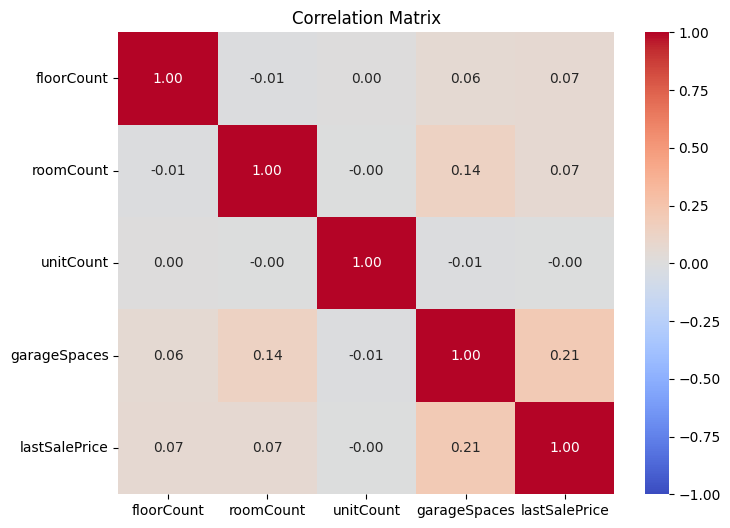

In [772]:
# List of features you want to check for correlation with 'lastSalePrice'
features_to_check = ['floorCount', 'roomCount', 'unitCount', 'garageSpaces', 'lastSalePrice']

# Calculate the correlation matrix
correlation_matrix = rent_cast_data[features_to_check].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [773]:
# Features to drop based on the correlation analysis
features_to_drop = ['unitCount', 'roomCount']

rent_cast_data = rent_cast_data.drop(columns=features_to_drop)

In [774]:
columns_to_drop = ['addressLine1', 'addressLine2', 'state', 'owner', 'ownerOccupied', 'hoa', 'legalDescription', 
                   'subdivision', 'assessorID', 'zoning', 'taxAssessments', 'history', 'features', 'id']

rent_cast_data = rent_cast_data.drop(columns=columns_to_drop)

rent_cast_data.head()

,formattedAddress,city,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSalePrice,propertyTaxes,year_month,m_rate,cooling_present,fireplace_present,garage_present,heating_present,pool_present,floorCount,garageSpaces
0,"2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",Fort Myers,33916,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,2024-03-15 00:00:00+00:00,315000.0,"{'2019': {'year': 2019, 'total': 2548}, '2022'...",2024-03,0.0682,0,0,0,0,0,7.0,NaN
1,"3607 Bridgewood Dr, Jacksonville, FL 32277",Jacksonville,32277,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,2024-03-15 00:00:00+00:00,345000.0,"{'2020': {'year': 2020, 'total': 2999}, '2021'...",2024-03,0.0682,1,0,1,1,0,2.0,2.0
2,"2025 Se 44th St, Cape Coral, FL 33904",Cape Coral,33904,Lee,26.568926,-81.932980,Single Family,3.0,2.0,2050.0,12000.0,1967.0,2024-03-15 00:00:00+00:00,850000.0,"{'2023': {'year': 2023, 'total': 10682}}",2024-03,0.0682,1,0,1,1,0,1.0,NaN
4,"11605 Sw 253rd St, Homestead, FL 33032",Homestead,33032,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,2024-03-15 00:00:00+00:00,445000.0,"{'2022': {'year': 2022, 'total': 5737}, '2023'...",2024-03,0.0682,0,0,0,0,0,2.0,NaN
5,"2020 Continental Ave, Apt 203, Tallahassee, FL...",Tallahassee,32304,Leon,30.455487,-84.315107,Condo,2.0,1.0,990.0,871.0,1967.0,2024-03-15 00:00:00+00:00,85000.0,"{'2023': {'year': 2023, 'total': 1163}}",2024-03,0.0682,0,0,0,0,0,NaN,NaN


In [775]:
# Drop rows where 'propertyType' is 'Land'
rent_cast_data_land = rent_cast_data[rent_cast_data['propertyType'] != 'Land']

# Verify that the rows with 'Land' have been dropped
print(f"Original shape: {rent_cast_data.shape}")
print(f"Cleaned shape: {rent_cast_data_land.shape}")

rent_cast_data = rent_cast_data_land

Original shape: (101351, 24)
Cleaned shape: (99787, 24)


In [776]:
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    74695
Condo            18925
Manufactured      3450
Multi-Family      1713
Townhouse          790
Apartment          212
Name: count, dtype: int64

In [777]:
rent_cast_data.shape

(99787, 24)

In [778]:
# Checking for NaN values in 'bedrooms' and 'bathrooms' columns
nan_bedrooms = rent_cast_data['bedrooms'].isna().sum()
nan_bathrooms = rent_cast_data['bathrooms'].isna().sum()

print(f"NaN values in 'bedrooms': {nan_bedrooms}")
print(f"NaN values in 'bathrooms': {nan_bathrooms}")

NaN values in 'bedrooms': 4032
NaN values in 'bathrooms': 2670


In [779]:
rent_cast_data_cleaned = rent_cast_data.dropna(subset=['bedrooms', 'bathrooms'], how='any')

print(f"Original shape: {rent_cast_data.shape}")
print(f"Cleaned shape: {rent_cast_data_cleaned.shape}")

rent_cast_data = rent_cast_data_cleaned

Original shape: (99787, 24)
Cleaned shape: (95722, 24)


In [780]:
rent_cast_data.shape

(95722, 24)

In [781]:
rent_cast_data.isnull().sum()

formattedAddress         0
city                     0
zipCode                  0
county                  54
latitude                 0
longitude                0
propertyType             1
bedrooms                 0
bathrooms                0
squareFootage           33
lotSize               8644
yearBuilt              156
lastSaleDate             0
lastSalePrice           14
propertyTaxes          681
year_month               0
m_rate                   0
cooling_present          0
fireplace_present        0
garage_present           0
heating_present          0
pool_present             0
floorCount           13889
garageSpaces         78566
dtype: int64

In [782]:
rent_cast_data_cleaned = rent_cast_data.dropna(subset=['propertyType'])

# Check the result
rent_cast_data = rent_cast_data_cleaned

In [783]:
rent_cast_data.shape

(95721, 24)

In [784]:
rent_cast_data = rent_cast_data.dropna(subset=['lastSalePrice'])

rent_cast_data['lastSalePrice'].isnull().sum()

np.int64(0)

In [785]:
rent_cast_data.head()

,formattedAddress,city,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSalePrice,propertyTaxes,year_month,m_rate,cooling_present,fireplace_present,garage_present,heating_present,pool_present,floorCount,garageSpaces
0,"2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",Fort Myers,33916,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,2024-03-15 00:00:00+00:00,315000.0,"{'2019': {'year': 2019, 'total': 2548}, '2022'...",2024-03,0.0682,0,0,0,0,0,7.0,NaN
1,"3607 Bridgewood Dr, Jacksonville, FL 32277",Jacksonville,32277,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,2024-03-15 00:00:00+00:00,345000.0,"{'2020': {'year': 2020, 'total': 2999}, '2021'...",2024-03,0.0682,1,0,1,1,0,2.0,2.0
2,"2025 Se 44th St, Cape Coral, FL 33904",Cape Coral,33904,Lee,26.568926,-81.932980,Single Family,3.0,2.0,2050.0,12000.0,1967.0,2024-03-15 00:00:00+00:00,850000.0,"{'2023': {'year': 2023, 'total': 10682}}",2024-03,0.0682,1,0,1,1,0,1.0,NaN
4,"11605 Sw 253rd St, Homestead, FL 33032",Homestead,33032,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,2024-03-15 00:00:00+00:00,445000.0,"{'2022': {'year': 2022, 'total': 5737}, '2023'...",2024-03,0.0682,0,0,0,0,0,2.0,NaN
5,"2020 Continental Ave, Apt 203, Tallahassee, FL...",Tallahassee,32304,Leon,30.455487,-84.315107,Condo,2.0,1.0,990.0,871.0,1967.0,2024-03-15 00:00:00+00:00,85000.0,"{'2023': {'year': 2023, 'total': 1163}}",2024-03,0.0682,0,0,0,0,0,NaN,NaN


In [786]:
rent_cast_data['squareFootage'].isna().sum()


np.int64(33)

In [787]:
rent_cast_data = rent_cast_data.dropna(subset=['squareFootage'])

In [788]:
# Dropping homes with a 'lastSalePrice' of under 100k
rent_cast_data_filtered_price = rent_cast_data[rent_cast_data['lastSalePrice'] >= 100000]

print(rent_cast_data_filtered_price['lastSalePrice'].describe())

rent_cast_data = rent_cast_data_filtered_price

count      92371.000000
mean      387718.152169
std       176920.511780
min       100000.000000
25%       255500.000000
50%       355000.000000
75%       490000.000000
max      1000000.000000
Name: lastSalePrice, dtype: float64


In [789]:
# Droping homes with 'lastSalePrice' over 900k
rent_cast_data_filtered_price = rent_cast_data[rent_cast_data['lastSalePrice'] <= 900000]

print(rent_cast_data_filtered_price['lastSalePrice'].describe())

rent_cast_data = rent_cast_data_filtered_price

count     92335.000000
mean     387495.527525
std      176594.381753
min      100000.000000
25%      255250.000000
50%      355000.000000
75%      490000.000000
max      900000.000000
Name: lastSalePrice, dtype: float64


In [790]:
label_encoder = LabelEncoder()

rent_cast_data['city_encoded'] = label_encoder.fit_transform(rent_cast_data['city'])

print(rent_cast_data[['city', 'city_encoded']].head())

           city  city_encoded
0    Fort Myers           125
1  Jacksonville           186
2    Cape Coral            50
4     Homestead           168
6  Jacksonville           186


In [791]:
label_encoder = LabelEncoder()

rent_cast_data['county_encoded'] = label_encoder.fit_transform(rent_cast_data['county'])

print(rent_cast_data[['county', 'county_encoded']].head())

       county  county_encoded
0         Lee              33
1       Duval              15
2         Lee              33
4  Miami-Dade              40
6       Duval              15


In [792]:
label_encoder = LabelEncoder()

rent_cast_data['propertyType_encoded'] = label_encoder.fit_transform(rent_cast_data['propertyType'])

print(rent_cast_data[['propertyType', 'propertyType_encoded']].head())

    propertyType  propertyType_encoded
0          Condo                     1
1  Single Family                     4
2  Single Family                     4
4  Single Family                     4
6  Single Family                     4


In [793]:
label_encoder = LabelEncoder()

rent_cast_data['propertyTaxes_encoded'] = label_encoder.fit_transform(rent_cast_data['propertyTaxes'])

print(rent_cast_data[['propertyTaxes', 'propertyTaxes_encoded']].head())

                                       propertyTaxes  propertyTaxes_encoded
0  {'2019': {'year': 2019, 'total': 2548}, '2022'...                   4836
1  {'2020': {'year': 2020, 'total': 2999}, '2021'...                  15480
2           {'2023': {'year': 2023, 'total': 10682}}                  72898
4  {'2022': {'year': 2022, 'total': 5737}, '2023'...                  63565
6  {'2022': {'year': 2022, 'total': 5684}, '2023'...                  63375


In [794]:
# Drop the 'county' and 'city' columns
rent_cast_data = rent_cast_data.drop(columns=['county', 'city', 'propertyType', 'propertyTaxes'])

In [795]:
rent_cast_data.head()

,formattedAddress,zipCode,latitude,longitude,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSalePrice,year_month,m_rate,cooling_present,fireplace_present,garage_present,heating_present,pool_present,floorCount,garageSpaces,city_encoded,county_encoded,propertyType_encoded,propertyTaxes_encoded
0,"2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",33916,26.652413,-81.855762,2.0,2.0,1003.0,44417.0,2006.0,2024-03-15 00:00:00+00:00,315000.0,2024-03,0.0682,0,0,0,0,0,7.0,NaN,125,33,1,4836
1,"3607 Bridgewood Dr, Jacksonville, FL 32277",32277,30.363895,-81.610043,3.0,2.0,1921.0,4464.0,1992.0,2024-03-15 00:00:00+00:00,345000.0,2024-03,0.0682,1,0,1,1,0,2.0,2.0,186,15,4,15480
2,"2025 Se 44th St, Cape Coral, FL 33904",33904,26.568926,-81.932980,3.0,2.0,2050.0,12000.0,1967.0,2024-03-15 00:00:00+00:00,850000.0,2024-03,0.0682,1,0,1,1,0,1.0,NaN,50,33,4,72898
4,"11605 Sw 253rd St, Homestead, FL 33032",33032,25.532831,-80.379346,3.0,2.5,1740.0,1870.0,2016.0,2024-03-15 00:00:00+00:00,445000.0,2024-03,0.0682,0,0,0,0,0,2.0,NaN,168,40,4,63565
6,"1525 Larue Ave, Jacksonville, FL 32207",32207,30.310031,-81.659007,3.0,1.0,990.0,11968.0,1926.0,2024-03-15 00:00:00+00:00,700000.0,2024-03,0.0682,1,0,1,1,0,1.0,2.0,186,15,4,63375


Correlation between Year Built and Last Sale Price: 0.1924389542436052


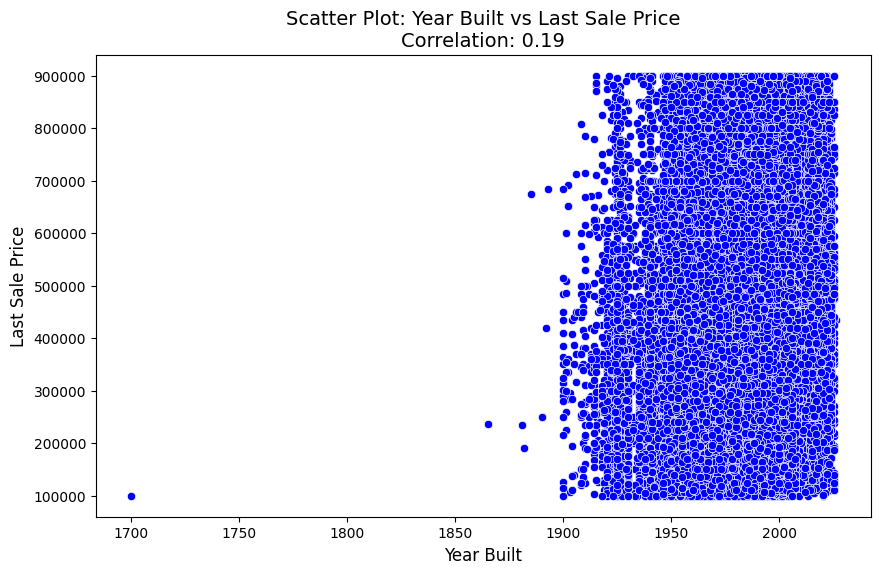

In [796]:
# Correlation between 'yearBuilt' and 'lastSalePrice'
correlation = rent_cast_data['yearBuilt'].corr(rent_cast_data['lastSalePrice'])
print(f"Correlation between Year Built and Last Sale Price: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rent_cast_data, x='yearBuilt', y='lastSalePrice', color='blue')

plt.title(f'Scatter Plot: Year Built vs Last Sale Price\nCorrelation: {correlation:.2f}', fontsize=14)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Last Sale Price', fontsize=12)

plt.show()

In [797]:
rent_cast_data = rent_cast_data[rent_cast_data['yearBuilt'] > 1979]

In [798]:
# Correct way to select multiple columns
cols = [
#'formattedAddress',
'squareFootage',
'lotSize',
'yearBuilt',
'cooling_present', 
'heating_present',
'fireplace_present', 
'garageSpaces',
'longitude',
'latitude',
'bathrooms',
'bedrooms',
'city_encoded',
'zipCode',
'county_encoded',
'propertyType_encoded',
  #'history',
  #'zoning',
'year_month',
'm_rate',
'propertyTaxes_encoded',
'lastSalePrice'
]

rent_cast_data = pd.get_dummies(
   rent_cast_data[cols])

# Check the result
rent_cast_data.head()

,squareFootage,lotSize,yearBuilt,cooling_present,heating_present,fireplace_present,garageSpaces,longitude,latitude,bathrooms,bedrooms,city_encoded,zipCode,county_encoded,propertyType_encoded,m_rate,propertyTaxes_encoded,lastSalePrice,year_month_2024-03,year_month_2024-04,year_month_2024-05,year_month_2024-06,year_month_2024-07,year_month_2024-08,year_month_2024-09,year_month_2024-10,year_month_2024-11,year_month_2024-12,year_month_2025-01
0,1003.0,44417.0,2006.0,0,0,0,NaN,-81.855762,26.652413,2.0,2.0,125,33916,33,1,0.0682,4836,315000.0,True,False,False,False,False,False,False,False,False,False,False
1,1921.0,4464.0,1992.0,1,1,0,2.0,-81.610043,30.363895,2.0,3.0,186,32277,15,4,0.0682,15480,345000.0,True,False,False,False,False,False,False,False,False,False,False
4,1740.0,1870.0,2016.0,0,0,0,NaN,-80.379346,25.532831,2.5,3.0,168,33032,40,4,0.0682,63565,445000.0,True,False,False,False,False,False,False,False,False,False,False
10,1196.0,42268.0,2022.0,1,1,0,NaN,-81.705227,30.415227,2.0,3.0,186,32208,15,4,0.0682,53432,236017.0,True,False,False,False,False,False,False,False,False,False,False
11,1577.0,5032.0,2006.0,0,0,0,2.0,-80.423809,25.486028,2.0,3.0,168,33033,40,4,0.0682,69507,380000.0,True,False,False,False,False,False,False,False,False,False,False


In [799]:
rent_cast_data.isnull().sum()

squareFootage                0
lotSize                   4585
yearBuilt                    0
cooling_present              0
heating_present              0
fireplace_present            0
garageSpaces             48481
longitude                    0
latitude                     0
bathrooms                    0
bedrooms                     0
city_encoded                 0
zipCode                      0
county_encoded               0
propertyType_encoded         0
m_rate                       0
propertyTaxes_encoded        0
lastSalePrice                0
year_month_2024-03           0
year_month_2024-04           0
year_month_2024-05           0
year_month_2024-06           0
year_month_2024-07           0
year_month_2024-08           0
year_month_2024-09           0
year_month_2024-10           0
year_month_2024-11           0
year_month_2024-12           0
year_month_2025-01           0
dtype: int64

In [800]:
rent_cast_data = rent_cast_data.dropna(subset=['lotSize'])

In [801]:
X = rent_cast_data.drop('lastSalePrice', axis=1) 
y = rent_cast_data['lastSalePrice']  # Target (price)

In [802]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [803]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [804]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [805]:
y_pred_rf = rf_model.predict(X_test)

In [806]:
print(f'R^2 score: {r2_score(y_test, y_pred_rf)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')

R^2 score: 0.6857444365663441
Mean Squared Error: 9191822884.835669


In [807]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state = 42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [808]:
y_pred_xgb = xgb_model.predict(X_test)

In [809]:
print(f'R^2 score: {r2_score(y_test, y_pred_xgb)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb)}')

R^2 score: 0.711115628438052
Mean Squared Error: 8449727822.098121


In [820]:
from joblib import dump

dump(xgb_model, open("xgb_model_default_42.sav", "wb"))

print("Model saved successfully using joblib.")

Model saved successfully using joblib.


In [811]:
#param_grid = {
#    'n_estimators': [50, 100, None],
#    'max_depth': [10, 50, None],
#    'min_samples_leaf': [1, 2, 5],
#    'max_features': ['sqrt', 'auto', None]
#}

#grid = GridSearchCV(rf_model, param_grid, scoring='r2', cv=5)
#grid.fit(X_train, y_train)

In [812]:
#print(f'Best Parameters: {grid.best_params_}')

In [813]:
# Extract the best model from the grid search
#best_rf_model = grid.best_estimator_

In [814]:
# Retraining the best model on the full training data
#best_rf_model.fit(X_train, y_train)

In [815]:
#y_pred = best_rf_model.predict(X_test)

In [816]:
#print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
#print(f'R^2 Score: {r2_score(y_test, y_pred)}')

In [817]:
#gb_model = GradientBoostingRegressor(random_state=42)

#gb_model.fit(X_train, y_train)

In [818]:
#y_pred_gb = gb_model.predict(X_test)

In [819]:
#print(f'R^2 score: {r2_score(y_test, y_pred_gb)}')
#print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_gb)}')